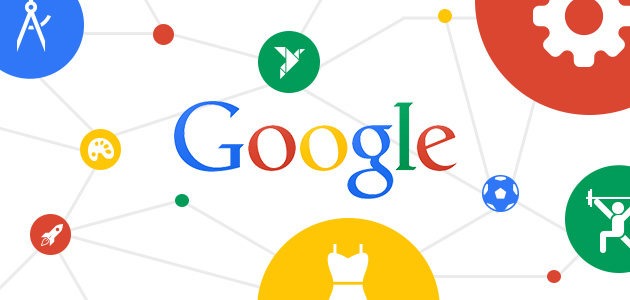

In [1]:
from IPython.display import display, Image
image_path = "google-graph.png"
display(Image(filename=image_path, width=800))

# Introduction

The Google Web Graph is a massive graph that represents the link structure of the World Wide Web. Links between pages represent the edges while web pages represent as the nodes. The graph offers insightful information on the web's structure and connectivity.

Importing necessary libraries.

In [2]:
import snap
import networkx as nx
import gzip
import pandas as pd

### Creating a Network using NetworkX 

First the code starts by loading the Google Web Graph dataset; it is located in a file with the path 'web-Google.txt.gz'. Then using NetworkX, generating an empty directed graph. After that using gzip to open the dataset file and to read its contents. Checking if a line begins with a "#" (comment) and skipping it. The source and destination nodes of an edge are then extracted by slicing the line along the tab ('t') character. Skipping a line if there aren't at least two values on it. Using the int function to try and convert the source and destination data to integers. We will add an edge connecting the source and destination nodes to the graph if the conversion is successful. After processing all the lines in the file, performing network analysis using NetworkX functions. Now, using the 'number_of_nodes' and 'number_of_edges' functions to determine the graph's nodes and edges, respectively. Finally, printing the number of nodes and edges in the graph.

In [3]:
file_path = 'web-Google.txt.gz'  # Replacing with the actual path to .gz file
# Loading the dataset into NetworkX directed graph
graph = nx.DiGraph()
with gzip.open(file_path, 'rt') as f:
    for line in f:
        if line.startswith('#'):
            continue
        line_values = line.strip().split('\t')
        if len(line_values) < 2:
            continue
        try:
            src, dst = map(int, line_values[:2])
        except ValueError:
            continue
        graph.add_edge(src, dst)

# Performing network analysis using NetworkX functions
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

print("Number of nodes: ",num_nodes)
print("Number of Edges: ",num_edges)

Number of nodes:  875713
Number of Edges:  5105039


### Clustering Coefficient

Calculating various network analysis metrics for the Google Web Graph dataset.
Calculating the average clustering coefficient of the graph. To measure the tendency of nodes in a graph to form clusters or communities. Calculating the average clustering coefficient of the graph using the nx.average_clustering() function and represents the mean value of clustering coefficients across all nodes. Calculating the graph's transitivity or connection probability. Now calculating the transitivity of the graph by the nx.transitivity() function, which gives an estimate of how interconnected the nodes are. A graph's average degree is calculated by averaging the mean number of edges that connect each node. Now using the graph.degree() method in the code to extract each node's degree using a list comprehension. The average degree is then calculated by summing all degrees and dividing by the total number of nodes.

In [4]:
# Calculating clustering coefficient
clustering_coefficient = nx.average_clustering(graph)
print("Clustering Coefficient:", clustering_coefficient)

# Calculating link probability
link_probability = nx.transitivity(graph)
print("Link Probability:", link_probability)

# Calculating average degree
degrees = [degree for node, degree in graph.degree()]
avg_degree = sum(degrees) / len(degrees)
print("Average Degree:", avg_degree)

Clustering Coefficient: 0.3698306814797672
Link Probability: 0.449540234004255
Average Degree: 11.659160021605253


### Network Analysis

The code starts by creating a dictionary called degree_distribution that stores the degree of each node in the graph. This degree distribution provides information about the distribution of node degrees, which can help in understanding the connectivity pattern of the graph. Now using the nx.weakly_connected_components() function, locating the graph's weakly connected components. Now, calculating the clustering coefficient and graph density. The density denotes the overall edge density in the graph, while the clustering coefficient measures how closely a node's neighbors are clustered or linked. 

In [5]:
# Performing Degree distribution analysis
degree_distribution = dict(graph.degree())
# Perform further analysis using the calculated degree distribution

# Performing Connected components analysis
connected_components = nx.weakly_connected_components(graph)
# Perform further analysis using the connected components

# Performing Clustering coefficient and density analysis
clustering_coefficient = nx.average_clustering(graph)
print("Clustering Coefficient:", clustering_coefficient)

density = nx.density(graph)
print("Density:", density)
# Performing further analysis using the clustering coefficient and density


Clustering Coefficient: 0.3698306814797672
Density: 6.656960291514363e-06


### Degree Distribution

After calculating the graph's degree distribution and saving it in the dictionary named degree_distribution. Extracting the degree_distribution dictionary's counts and degrees by the algorithm in order to prepare the data for visualization. In the degree list are the degrees, and in the counts list are the matching counts. Now creating a scatter plot with each data point representing a degree-count pair using plt.scatter(). Setting the color parameter determines the markers' color, and setting the marker parameter affects the data points. labeling the x-axis "Degree," the y-axis "Count," and the plot's title "Degree Distribution." Using plt.xscale("log") and plt.yscale("log"), respectively, the code scales the x- and y-axes logarithmically. Finally, plotting the degree distribution using plt.show().

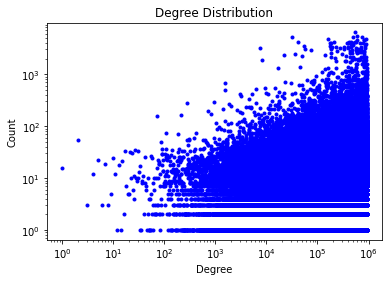

In [6]:
import matplotlib.pyplot as plt

# Calculating the degree distribution
degree_distribution = dict(graph.degree())

# Plotting the degree distribution
degrees = list(degree_distribution.keys())
counts = list(degree_distribution.values())

plt.scatter(degrees, counts, marker='.', color='b')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Network comparison using ER, BA, WS

Generating three different types of random graphs using NetworkX.
'n' represents the number of nodes in the ER, BA and WS graph. In an ER or WS random graph, 'p' denotes the likelihood that any two nodes will have an edge connecting them. Each node in a ring has a connection to 'k' nearest neighbors, which is the number of neighbors. The value 'm' indicates how many edges must connect a new node to an existing node. With the help of the 'nx.barabasi_albert_graph()' function, the BA random graph object ba_graph was developed. Using the 'nx.erdos_renyi_graph()' function, the ER random graph object er_graph was created. Using the 'nx.watts_strogatz_graph()' function, the WS random graph object ws_graph was created. Printing the next text for each random node, use '.number_of_nodes()' and '.number_of_edges()'.

In [7]:
# Erdos-Renyi (ER) random graph
n = 1000  # number of nodes
p = 0.1  # probability of an edge between any pair of nodes
er_graph = nx.erdos_renyi_graph(n, p)

# Barabasi-Albert (BA) random graph
n = 1000  
m = 2    # connection of edges from new node to existing one.
ba_graph = nx.barabasi_albert_graph(n, m)

# Watts-Strogatz (WS) random graph
n = 1000  
k = 4    # k nearest neighbors.
p = 0.3  
ws_graph = nx.watts_strogatz_graph(n, k, p)

# Printing information about the generated graphs
print("ER Random Graph:")
print("Nodes:", er_graph.number_of_nodes())
print("Edges:", er_graph.number_of_edges())

print("\nBA Random Graph:")
print("Nodes:", ba_graph.number_of_nodes())
print("Edges:", ba_graph.number_of_edges())

print("\nWS Random Graph:")
print("Nodes:", ws_graph.number_of_nodes())
print("Edges:", ws_graph.number_of_edges())


ER Random Graph:
Nodes: 1000
Edges: 50158

BA Random Graph:
Nodes: 1000
Edges: 1996

WS Random Graph:
Nodes: 1000
Edges: 2000


### Plotting Random Graph

The two functions create_random_graph(n, p) and plot_graph(graph) are included in the given code. The create_random_graph function constructs an undirected random graph with n nodes and a probability of p that an edge will connect each pair of nodes. The resulting graph returned. Using NetworkX and Matplotlib, the plot_graph function takes a graph as an input and displays it. The spring layout method is used to position the nodes, and after that, the nodes and edges are created with a certain style. Finally, creating a random graph using create_random_graph with predetermined variables and displaying it on a plot will be done by calling plot_graph(random_graph). 

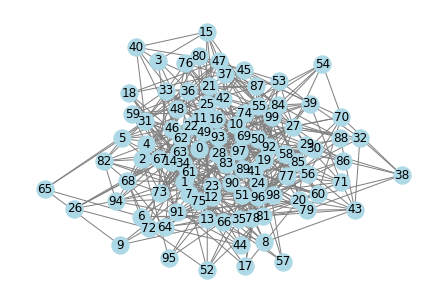

In [8]:
import random
import matplotlib.pyplot as plt

def create_random_graph(n, p):
    """
    Creates a random undirected graph with n nodes and 
    a probability p of a link between each pair of nodes.
    """
    graph = nx.Graph()
    
    for u in range(n):
        for v in range(u + 1, n):
            if random.random() < p:
                graph.add_edge(u, v)
    
    return graph

def plot_graph(graph):
    """
    Plots the given graph.
    """
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

# Defining the number of nodes and probability of a link
n = 100  
p = 0.1  

# Creating a random graph
random_graph = create_random_graph(n, p)

# Plotting the graph
plot_graph(random_graph)


### Connected Components

The nx.strongly_connected_components function from NetworkX, which produces a list of sets where each set represents a strongly connected component, is used to determine the strongly connected components. The len function is then used to count the number of components with a high degree of connectivity, and then printing the result. Similarly, calculating the weakly connected components using nx.weakly_connected_components function and printing the result. Using the maximum length of strongly connected components and the maximum length of weakly connected components, to identify the largest strongly connected component and the largest weakly connected component. Finally printing out the results for both strongly and weakly connected components. 

In [9]:
# Calculating the strong components
strong_components = list(nx.strongly_connected_components(graph))

# Counting the number of strong components
num_strong_components = len(strong_components)
print("Number of Strong Components:", num_strong_components)

# Calculating the weak components
weak_components = list(nx.weakly_connected_components(graph))

# Counting the number of weak components
num_weak_components = len(weak_components)
print("Number of Weak Components:", num_weak_components)

# Getting the largest strong component
largest_strong_component = max(strong_components, key=len)
print("Size of the Largest Strongly Component:", len(largest_strong_component))

# Getting the largest weakly component
largest_weak_component = max(weak_components, key=len)
print("Size of the Largest Weakly Component:", len(largest_weak_component))


Number of Strong Components: 371764
Number of Weak Components: 2746
Size of the Largest Strongly Component: 434818
Size of the Largest Weakly Component: 855802


### Path Analysis

Using Dijkstra's technique to determine a graph's shortest path. The source node is initially set to 1 and the target node is first set to 10. Finding the shortest path from source node to target node is then accomplished using the nx.shortest_path(graph, source, target) function. Then printing the output after storing the Shortest Path result in the "shortest_path" function. Using the function nx.shortest_path_length(graph, source, target), which returns the length (number of edges) of the shortest path between the source and target nodes, we can now calculate the shortest path length. We then store the result in shortest_path_length and print the result.

In [10]:
# Calculating the shortest path between two nodes
source = 1  # Source node
target = 10  # Target node
shortest_path = nx.shortest_path(graph, source, target)

# Printing the shortest path
print("Shortest Path:", shortest_path)

# Calculating the shortest path length
shortest_path_length = nx.shortest_path_length(graph, source, target)

# Printing the shortest path length
print("Shortest Path Length:", shortest_path_length)


Shortest Path: [1, 223236, 421091, 8101, 606408, 237831, 202412, 361076, 507927, 653662, 10]
Shortest Path Length: 10


### Centrality Analysis

Calculating the eigenvector centrality for each node in the graph using the 'nx.eigenvector_centrality_numpy(graph)' function from the NetworkX library. The function uses power iteration to find the centrality values. Then using 'sorted()' function to select top 10 nodes with the highest eigenvector centrality scores.. Then using 'print(f"Node: {node}, Eigenvector Centrality: {centrality}")' to print top 10 nodes.

In [11]:
# Calculating eigenvector centrality using the NumPy implementation
eigenvector_centrality = nx.eigenvector_centrality_numpy(graph)

# Getting the top 10 nodes with highest eigenvector centrality
top_10_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:10]

# Printing the eigenvector centrality for each of the top 30 nodes
for node in top_10_nodes:
    centrality = eigenvector_centrality[node]
    print("Node:", node, "Eigenvector Centrality:", centrality)

Node: 768091 Eigenvector Centrality: 0.42512684900445596
Node: 305229 Eigenvector Centrality: 0.41495051868900024
Node: 180689 Eigenvector Centrality: 0.3932091508556628
Node: 203748 Eigenvector Centrality: 0.39320915085566266
Node: 327037 Eigenvector Centrality: 0.04876339752218202
Node: 529893 Eigenvector Centrality: 0.04093685822931892
Node: 359902 Eigenvector Centrality: 0.03932261167003466
Node: 440565 Eigenvector Centrality: 0.0345824226804634
Node: 891981 Eigenvector Centrality: 0.0338977730214737
Node: 821211 Eigenvector Centrality: 0.03356008843836157


Calculating the degree centrality using 'nx.degree_centrality(graph)'.  Then using 'sorted()' function to sort the nodes in descending order. Then selecting top 10 nodes using indexing [:10] with the highest degree centrality. Finally printing the result.

In [12]:
# Calculate the degree centrality
degree_centrality = nx.degree_centrality(graph)

# Get the top 10 nodes with highest degree centrality
top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

# Print the degree centrality for each of the top 10 nodes
for node in top_10_nodes:
    centrality = degree_centrality[node]
    print("Node:", node, "Degree Centrality:", centrality)

Node: 537039 Degree Centrality: 0.007254668201417818
Node: 597621 Degree Centrality: 0.006139004604253453
Node: 504140 Degree Centrality: 0.006040798801432434
Node: 751384 Degree Centrality: 0.005995121683841263
Node: 32163 Degree Centrality: 0.005856948403127969
Node: 885605 Degree Centrality: 0.005534924724110209
Node: 163075 Degree Centrality: 0.005443570488927867
Node: 819223 Degree Centrality: 0.005295119856756559
Node: 605856 Degree Centrality: 0.005220894540670906
Node: 828963 Degree Centrality: 0.005128398377548783


# Findings

The dataset contains 875,713 nodes and 5,105,039 edges, indicating a relatively large-scale network.

1. The clustering coefficient is 0.3698, which suggests the presence of clustering in the network. This indicates some degree of local connectedness because nodes have a tendency to gather together or form clusters.


2. The network has a pretty high likelihood of having links between any two nodes, as indicated by the link probability of 0.4495. This suggests that there is a high degree of connectedness and information flow potential.


3. The average degree is 11.659, which means that each node is typically connected to 11.659 additional nodes. This gives insight about the network's general connectedness and the possible reach of its information.


4. The degree distribution analysis displays the distribution of node degrees, giving information about the network's connectivity pattern. The degree distribution that has been depicted appears to be scale-free, with most nodes having low degrees and only a few clusters with high degrees.


5. There are 2,746 weakly connected components and 371,764 strongly connected components in the network. There are 855,802 nodes in the greatest poorly connected component and 434,818 nodes in the largest strongly connected component, respectively. This suggests the presence of both densely connected groupings of nodes and weakly connected components.


6. Analyzing the shortest paths between nodes in more detail, as they provide information on connectivity and network performance. Using this study, it will be possible to identify the nodes that are essential for maintaining the network's effective information flow.


7. The extremely low network density means that there are comparatively few edges already present as compared to all possible edges. This indicates a weak and unstable network structure.

### Based on these findings, the research questions can be addressed as follows:

Community Detection: Can we distinguish between different communities or groupings in the social network? What are the traits of these communities, and how do they interact?

    1. We can use community detection algorithms to find distinctive communities or groupings within the social network, such as Louvain, Girvan-Newman, or Infomap.
    
    2. Examine how influential nodes or local leaders might influence or improve relationships between communities.
    
    3. We can use metrics like overlapping nodes or intercommunity edges to analyze how these communities interact with one another.


Network Resilience: How resistant is the network to losing nodes or edges? What crucial nodes or edges would have the most effects on network connection if they were removed?

    1. We can analyze resilience by modeling scenarios of node or edge removal and calculating the effect on network connection.
    
    2. By utilizing metrics that indicate the significance of a node or edge in maintaining network connectivity, such as node betweenness centrality or edge betweenness centrality, we can identify essential nodes or edges.
    
    3. Changes in measures such as network diameter, average path length, or size of the largest connected component can be used to evaluate the network's resilience.

Structural Analysis: What is the overall network structure? Are there any frequent trends or patterns in the network? How is its behavior or functionality impacted by the network topology?

    1. We can examine the properties of the network as a whole, such as the degree distribution, the clustering coefficient, and the average path length.
    
    2. Look for recurring substructures in the network, such as triangles, cliques, or clusters, as patterns or motifs.
    
    3. We can use network visualization software to see the network structure and spot any visually obvious patterns or clusters, such as Gephi or Cytoscape.

# Conclusion

The results of the research indicate that the Google Web network is clustered, has moderate connectivity, and has both strongly and weakly connected components. It displays a scale-free degree distribution with a small number of clusters that are highly connected and a large number of nodes that are weakly connected. Additionally, the top 10 nodes with the highest eigenvector centrality are identified. The higher the centrality score, the more influential the node is within the network. The most connections are between the top 10 nodes with the highest degree centrality, indicating their importance in the information flow and general connectivity of the network. These nodes are important and play a significant role in network communication.